In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

In [3]:
(x_train,y_train),(x_valid,y_valid)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
type(x_train)

numpy.ndarray

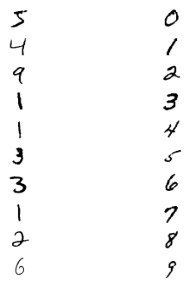

In [5]:
plt.figure(figsize=(5,5))
for k in range(20):
  plt.subplot(10, 2,k+1)
  plt.imshow(x_train[k],cmap='Greys')
  plt.axis('off')
plt.show()


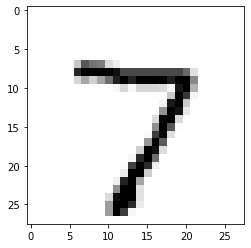

In [6]:
plt.imshow(x_valid[0],cmap='Greys')

**Pre process the data**

In [7]:
x_train=x_train.reshape(60000,784).astype('float32')
x_valid=x_valid.reshape(10000,784).astype('float32')

In [8]:
x_train/=255
x_valid/=255

In [9]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
from keras import utils as np_utils
n_classes=10

y_train=keras.utils.np_utils.to_categorical(y_train,n_classes)
y_valid=keras.utils.np_utils.to_categorical(y_valid,n_classes)

In [11]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

model build

In [12]:
model=Sequential()

In [13]:
model.add(Dense(64,activation='sigmoid',input_shape=(784,)))

In [14]:
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


compile the network

In [16]:
model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

In [17]:
history=model.fit(x_train,y_train,batch_size=128,epochs=150,verbose=1)

Epoch 1/150
469/469 [==============================] - 2s 3ms/step - loss: 0.0931 - accuracy: 0.1172
Epoch 2/150
469/469 [==============================] - 1s 3ms/step - loss: 0.0921 - accuracy: 0.1384
Epoch 3/150
469/469 [==============================] - 1s 3ms/step - loss: 0.0914 - accuracy: 0.1550
Epoch 4/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.1654
Epoch 5/150
469/469 [==============================] - 1s 3ms/step - loss: 0.0903 - accuracy: 0.1731
Epoch 6/150
469/469 [==============================] - 1s 3ms/step - loss: 0.0899 - accuracy: 0.1838
Epoch 7/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0895 - accuracy: 0.1996
Epoch 8/150
469/469 [==============================] - 1s 3ms/step - loss: 0.0891 - accuracy: 0.2265
Epoch 9/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0888 - accuracy: 0.2751
Epoch 10/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0884 - accura

dict_keys(['loss', 'accuracy'])


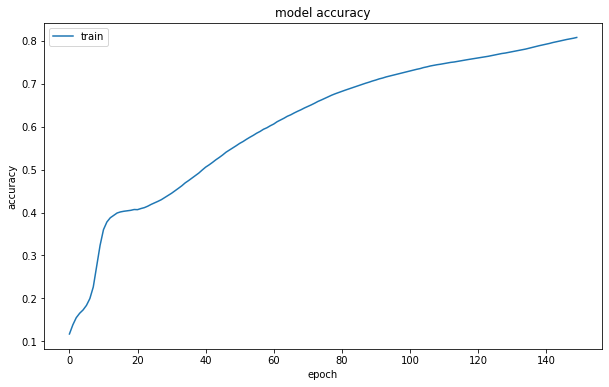

In [18]:
plt.figure(figsize=(10,6))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

